<a href="https://colab.research.google.com/github/yebiny/Lecture-Python-Data_analysis-LV1/blob/main/09_%EB%8D%B0%EC%9D%B4%ED%84%B0%ED%83%90%EC%83%89.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 09. 데이터 탐색 (EDA) 실습
---
* 날짜:
* 이름:


```
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# seaborn
import seaborn as sns

plt.rcParams["font.size"] = 13
plt.style.use('ggplot')
plt.style.use('seaborn-whitegrid')
```

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# seaborn
import seaborn as sns

plt.rcParams["font.size"] = 13
plt.style.use('ggplot')
plt.style.use('seaborn-whitegrid')


## **데이터 소개**
---


> * 데이터 출처 : https://www.kaggle.com/c/titanic/data?select=train.csv
> * 추가 설명: https://dacon.io/competitions/open/235539/overview/description

타이타닉은 역사상 가장 유명한 난파선 중 하나입니다.

1912년 4월 15일, 타이타닉은 항해중 빙산과의 충돌로 인해 침몰합니다. 탑승인원 2224명 중 1502명이 사망한 비극적인 사건이었고, 선박의 안전규정을 개선시키는 계기가 되었습니다.

이 과제에서는 여러분은 어떤 종류의 사람들이 많이 살아남았는지에 대한 분석을 해야 합니다.
그리고 머신러닝을 이용해 어떤 승객이 생존했을지 예측해보세요. 


|index|column|설명|
|--|--|--|
|0.| PassengerId||
|1.| Survived | 생존여부|
|2. |Pclass| 티켓 등급|
|3.| Name |이름|
|4.| Sex| 성별|
|5.| Age |나이|
|6.| SibSp| 타이타닉호에 탑승한 형제/배우자 수|
|7.| Parch |타이타닉호에 탑승한 부모/자녀 수 |
|8.| Ticket |티켓 번호|
|10| Fare |여객 요금|
|11.| Cabin| 객실 번호|
|12.| Embarked| 승선항|


코랩에 파일을 빠르게 업로드를 하기 위해서는 아래 코드를 실행합니다.


```
from google.colab import files
files.upload()
```



In [ ]:
from google.colab import files
files.upload()

## **데이터 탐색(EDA)**

---
### **데이터 확인**
---

In [ ]:
df = pd.read_csv("train.csv") 
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB





* **INSIGHT**
  * 전체 데이터 개수가 891개이고 속성은 12개이다.
  * 속성 중 예측값 Survived 단순순번 PassengerId 제외하면 10개의 독립변수 (features) 가 있다.
  * 결측값이 있는 속성 Age , Cabin, Embarked
  * Cabin의 경우 결측값이 많아서 데이터로 쓰기 부적절

---
### **모든 속성의 분포 확인**
---

['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked']


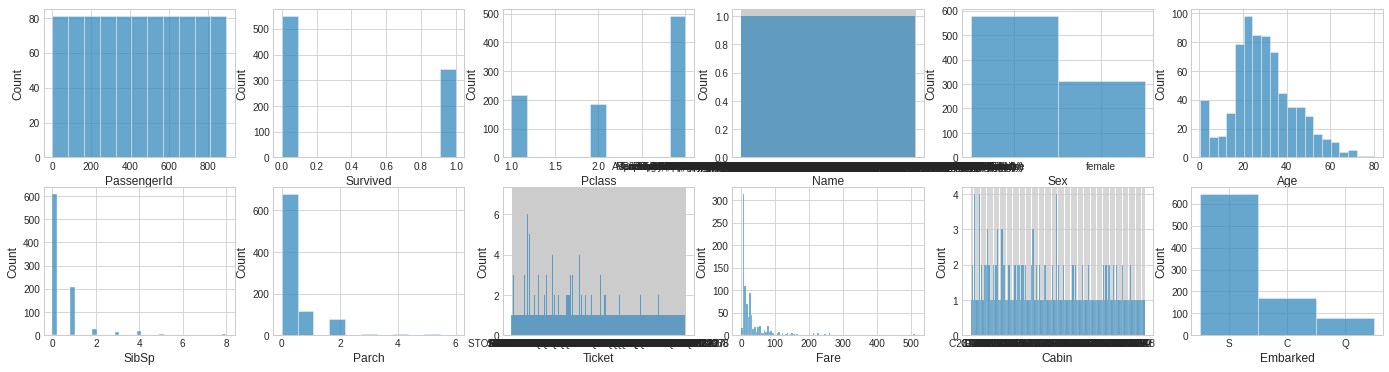

In [ ]:
f, ax = plt.subplots(2, 6, figsize=(24,6))
ax = ax.flatten()

col_list = list(df.columns)
print(col_list)

for i in range(len(col_list)):
  sns.histplot(data=df, x = col_list[i], ax=ax[i])
plt.show()

* **INSIGHT**

  * 필요없는 값
    * 0. `Passengerid` 
    * 3. `Name`
    * 8. `Ticket` 
    * 10. `Cabin`
  * 범주형 값
    * 1. `Survived` : **예측값**
    * 2. `Pclass` : 좌석의 등급 (1,2,3) 정수타입
    * 4. `Sex`: 성별 (Male/Female) 문자열 타입 
    * 12. `Embarked`: 승선항 (S/C/Q) 문자열 타입
  * 수치형 값
    * 5. `Age`: 나이 float 
    * 6. `SibSp`: 형제수 int
    * 7. `Parch` : 부모/자식 수 int
    * 9. `Fare`: 요금

---
### **범주형 자료 시각화**
---

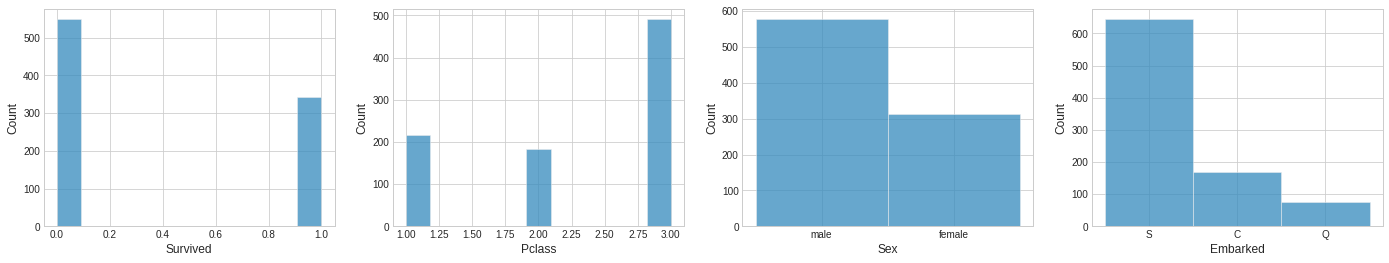

In [ ]:
f, ax = plt.subplots(1, 4, figsize=(24,4))
ax = ax.flatten()

col_list = ["Survived", "Pclass", "Sex", "Embarked"]

for i in range(len(col_list)):
  sns.histplot(data=df, x = col_list[i], ax=ax[i])
plt.show()

* **INSIGHT**

  * 예측값인 생존여부는 사망자 수가 많다. 데이터불균형 문제가 있다.
  * 좌석등급은 3등급이 다른 등급에 비해 많음
  * 성별은 남성이 여성의 두배가까이
  * 승선항은 3가지 카테고리며 S의 개수가 월등히 많다.

---
### **수치형 자료 시각화**
---

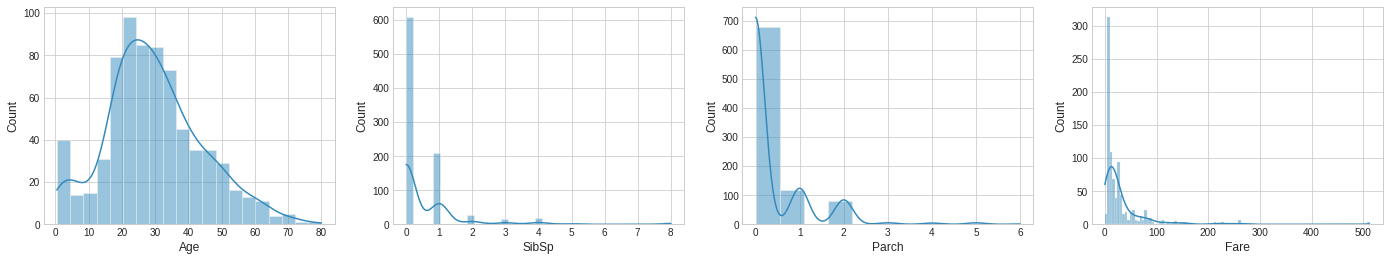

In [ ]:
f, ax = plt.subplots(1, 4, figsize=(24,4))
ax = ax.flatten()

col_list = ["Age", "SibSp", "Parch", "Fare"]

for i in range(len(col_list)):
  sns.histplot(data=df, x = col_list[i], ax=ax[i], kde=True)
plt.show()

* **INSIGHT**

  * 나이 20-40대가 주로 있고 특이하게 5세이하 아이들이 많네
  * 가족단위보다는 혼자 탑승한 사람이 많다.
  * 요금은 이상치를 주의해야 함

---
### **예측(Survived)값과의 관계 시각화 - 범주형 자료**
---

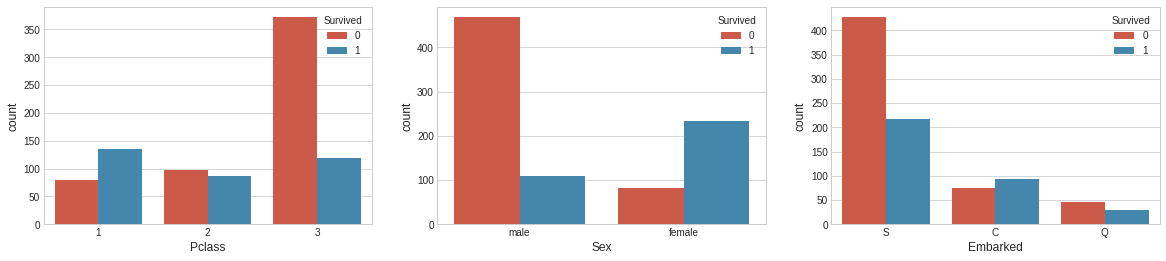

In [ ]:
f, ax = plt.subplots(1, 3, figsize=(20,4))
ax = ax.flatten()

col_list = ["Pclass", "Sex", "Embarked"]

for i in range(len(col_list)):
  sns.countplot(data=df, x = col_list[i], hue='Survived', ax=ax[i])
plt.show()

* **INSIGHT**

  * 등급에 따라 확연한 생존의 차이가 있다. 좌석등급이 높을수록(1등급>2등급>3등급) 생존 가능성이 크다.
  * 성별에서는 여성이 남성보다 생존 가능성이 크다.
  * 승선항 경우는 C 승선항에서 생존가능성이 유일하게 더 크다.

---
### **예측(Survived)값과의 관계 시각화 - 수치형 자료**
---

#### **1. Discrete Data: `SibSp, Parch`**

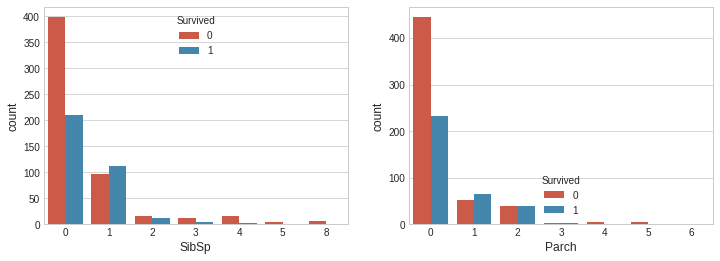

In [ ]:
f, ax = plt.subplots(1, 2, figsize=(12,4))
ax = ax.flatten()

col_list = ["SibSp", "Parch"]

for i in range(len(col_list)):
  sns.countplot(data=df, x = col_list[i], hue='Survived', ax=ax[i])
plt.show()

* **INSIGHT**

  * 혼자 온 사람보다 가족이 함께 왔을 때 생존 확률이 높다.
  * 전처리 시 이산형으로 (혼자/가족) 분류해도 적절해 보인다.

#### **2. Countinuous Data: `Age, Fare`**

* **INSIGHT**

  * 
  * .

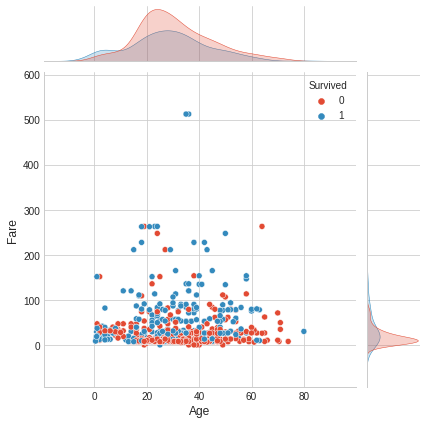

In [ ]:
sns.jointplot( x= 'Age', y='Fare', data=df, hue='Survived')
plt.show()

* **INSIGHT**

  * 요금의 경우 이상치가 있어 이를 처리해 주어야 함.
  * 나이의 경우 0부터 1까지 정규화.

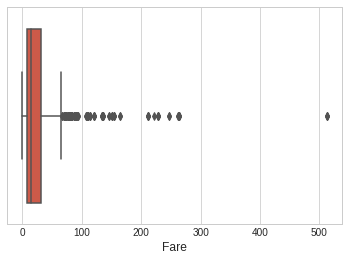

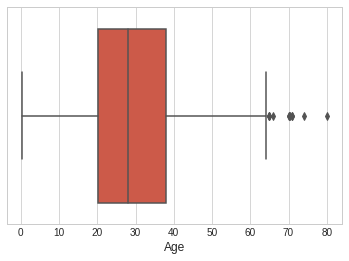

In [ ]:
sns.boxplot(x='Fare', data=df)
plt.show()
sns.boxplot(x='Age', data=df)
plt.show()

* **INSIGHT**

  * .
  * .

---
### **기타 시각화**
---

#### **전체 페어플롯**

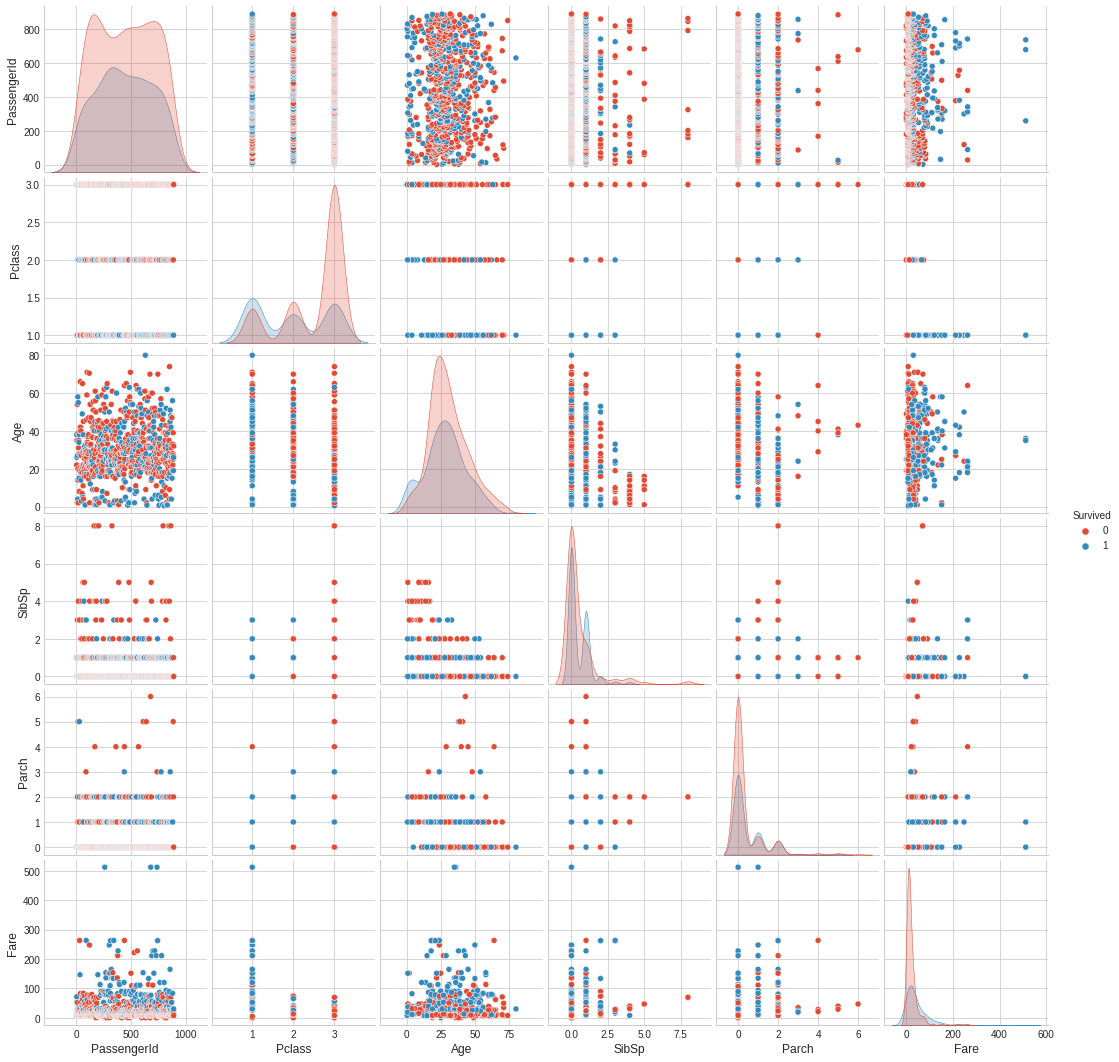

In [ ]:
sns.pairplot(df, hue='Survived')
plt.show()

* **INSIGHT**

  * .
  * .

#### **상관관계**

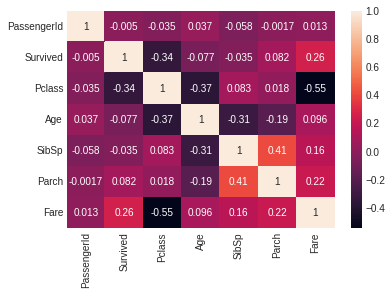

In [ ]:
sns.heatmap(df.corr(), annot=True)
plt.show()

---
### **Summary**
---

* **INSIGHT**

  * 생존여부와 연관성이 많은 속성은 다음과 같다.
    * Pclass
    * Sex
    * Fare
  * 이 중 Pclass Fare 은 상관관계가 높다. 
  * 연관성은 높지 않게 나왔지만 예측에 도움 될 수 있는 속성은 다음과 같다.
    * Age
    * Embarked
    * SibSp
    * Parch 
  * 이 중에서 결측값이 있는 속성은 Age, Embarked 이다.
    * Age: 평균값으로 대체
    * Embarked: 클래스의 개수가 가장 많고 생존여부의 분포가 전체 분포화 비슷한 "C" 로 대체

  * 그 외 속성들은 사용하지 않는다.